In [1]:
import cv2
import ipywidgets as widgets
from IPython.display import display

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error opening video stream or file")

image_widget = widgets.Image(format='jpeg')

def display_frame():
    ret, frame = cap.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image_widget.value = cv2.imencode('.jpg', frame)[1].tobytes()

display(image_widget)

while True:
    display_frame()

cap.release()
cv2.destroyAllWindows()

Image(value=b'', format='jpeg')

KeyboardInterrupt: 

In [2]:
import heapq

def dijkstra(graph, start, end):
    """
    Find the shortest path from start to end in a weighted graph.
    """

    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {}
    pq = [(0, start)]

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if current_node == end:
            break

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    path = []
    node = end
    while node is not None:
        path.append(node)
        node = previous.get(node)

    return path[::-1]

graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

start_node = 'A'
end_node = 'D'

shortest_path = dijkstra(graph, start_node, end_node)
print("Shortest path:", shortest_path)

Shortest path: ['A', 'B', 'C', 'D']


In [3]:
import networkx as nx
import math

def calculate_distance(coord1, coord2):
    # Calculate the Euclidean distance between two coordinates
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    return math.sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2)

def find_shortest_route(coordinates, packages):
    """
    Finds the shortest route for delivering packages across given coordinates.

    Args:
        coordinates: A list of coordinate tuples (latitude, longitude).
        packages: A list of package delivery points, each corresponding to an index in 'coordinates'.

    Returns:
        A list of coordinate tuples representing the shortest delivery route.
    """

    # Create a graph where nodes are coordinates and edges are distances between them
    G = nx.Graph()
    for i in range(len(coordinates)):
        G.add_node(i)
        for j in range(i+1, len(coordinates)):
            distance = calculate_distance(coordinates[i], coordinates[j])
            G.add_edge(i, j, weight=distance)

    # Find the shortest path using the 'packages' list as the delivery order
    route = []
    current_node = packages[0]
    for next_package in packages[1:]:
        # Ensure we don't repeat nodes unnecessarily
        path_segment = nx.shortest_path(G, current_node, next_package, weight='weight')
        if route and route[-1] == path_segment[0]:
            path_segment = path_segment[1:]  # Remove duplicate node
        route.extend(path_segment)
        current_node = next_package

    # Return the coordinates corresponding to the shortest route
    return [coordinates[i] for i in route] 

# Example usage
coordinates = [(23.06943513772291, 72.54411944399502), (23.03893641653161, 72.45832249491855), (22.96271430739746, 72.59061390786765), (22.95781699051088, 72.61219905060842), (23.04871624996336, 72.51045411855083)]
packages = [0, 2, 1, 4, 3]  # Delivery order: coordinate 0, then 2, then 1, etc.

shortest_path = find_shortest_route(coordinates, packages)
print(shortest_path)

[(23.06943513772291, 72.54411944399502), (22.96271430739746, 72.59061390786765), (23.03893641653161, 72.45832249491855), (23.04871624996336, 72.51045411855083), (22.95781699051088, 72.61219905060842)]


In [4]:
!pip install numpy scipy matplotlib

Shortest path: (array([0, 0]), array([1, 2]), array([2, 4]), array([4, 3]), array([3, 1]))
Minimum distance: 12.10654957016754


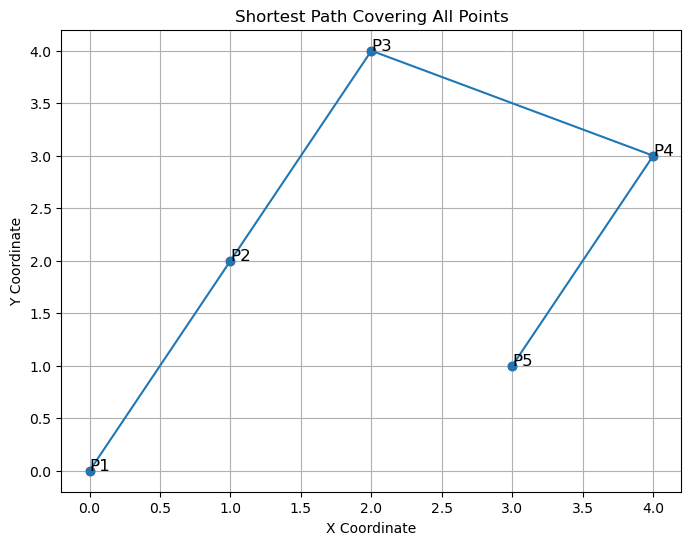

In [5]:
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt

# Define the coordinates of the points
points = np.array([
    [0, 0],  # Point A
    [1, 2],  # Point B
    [2, 4],  # Point C
    [3, 1],  # Point D
    [4, 3]   # Point E
])

# Function to calculate the distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Function to calculate the total distance of a given path
def calculate_total_distance(path):
    total_distance = 0
    for i in range(len(path)):
        total_distance += calculate_distance(path[i], path[(i + 1) % len(path)])
    return total_distance

# Find the shortest path using brute-force
def find_shortest_path(points):
    shortest_path = None
    min_distance = float('inf')
    
    for perm in permutations(points):
        distance = calculate_total_distance(perm)
        if distance < min_distance:
            min_distance = distance
            shortest_path = perm
            
    return shortest_path, min_distance

# Find the shortest path and distance
shortest_path, min_distance = find_shortest_path(points)

# Print the results
print("Shortest path:", shortest_path)
print("Minimum distance:", min_distance)

# Plotting the points and the shortest path
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], color='red')
plt.plot(*zip(*shortest_path), marker='o')
for i, point in enumerate(shortest_path):
    plt.text(point[0], point[1], f'P{i+1}', fontsize=12)
plt.title('Shortest Path Covering All Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()

In [6]:
!pip install folium

In [7]:
import numpy as np
from itertools import permutations
import folium

# Define the coordinates of the points
points = np.array([
    (23.06943513772291, 72.54411944399502),  # Point 1
    (22.96271430739746, 72.59061390786765),  # Point 2
    (23.03893641653161, 72.45832249491855),  # Point 3
    (23.04871624996336, 72.51045411855083),  # Point 4
    (22.95781699051088, 72.61219905060842)   # Point 5
])

# Function to calculate the distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Function to calculate the total distance of a given path
def calculate_total_distance(path):
    total_distance = 0
    for i in range(len(path)):
        total_distance += calculate_distance(path[i], path[(i + 1) % len(path)])
    return total_distance

# Find the shortest path using brute-force
def find_shortest_path(points):
    shortest_path = None
    min_distance = float('inf')
    
    for perm in permutations(points):
        distance = calculate_total_distance(perm)
        if distance < min_distance:
            min_distance = distance
            shortest_path = perm
            
    return shortest_path, min_distance

# Find the shortest path and distance
shortest_path, min_distance = find_shortest_path(points)

# Print the results
print("Shortest path (latitude, longitude):", shortest_path)
print("Minimum distance:", min_distance)

# Create a map centered around the average location of the points
map_center = np.mean(points, axis=0)
map_ahmedabad = folium.Map(location=map_center, zoom_start=12)

# Add points to the map
for i, point in enumerate(points):
    folium.Marker(location=point, popup=f'Point {i+1}').add_to(map_ahmedabad)

# Add the shortest path to the map
shortest_path_list = [(lat, lon) for lat, lon in shortest_path]
folium.PolyLine(locations=shortest_path_list, color='blue', weight=2.5, opacity=0.8).add_to(map_ahmedabad)

# Display the map
map_ahmedabad

Shortest path (latitude, longitude): (array([23.06943514, 72.54411944]), array([23.04871625, 72.51045412]), array([23.03893642, 72.45832249]), array([22.96271431, 72.59061391]), array([22.95781699, 72.61219905]))
Minimum distance: 0.3981255725964948


In [8]:
!pip install osmnx

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import folium

# Define the coordinates of the points
points = [
    (23.06943513772291, 72.54411944399502),  # Point 1
    (22.96271430739746, 72.59061390786765),  # Point 2
    (23.03893641653161, 72.45832249491855),  # Point 3
    (23.04871624996336, 72.51045411855083),  # Point 4
    (22.95781699051088, 72.61219905060842)   # Point 5
]

# Get the graph of roads in Ahmedabad
place_name = "Ahmedabad, Gujarat, India"
graph = ox.graph_from_place(place_name, network_type='drive')

# Function to get the nearest node for a given point
def get_nearest_node(lat, lon):
    return ox.distance.nearest_nodes(graph, lon, lat)

# Get the nearest nodes for all points
nodes = [get_nearest_node(lat, lon) for lat, lon in points]

# Calculate the shortest path
shortest_route = nx.shortest_path(graph, source=nodes[0], target=nodes[-1], weight='length')
route_distance = nx.shortest_path_length(graph, source=nodes[0], target=nodes[-1], weight='length')

# Print the shortest route distance
print("Shortest path nodes:", shortest_route)
print("Route distance (meters):", route_distance)

# Create a folium map to visualize the route
map_center = np.mean(points, axis=0)
map_ahmedabad = folium.Map(location=map_center, zoom_start=12)

# Add the points to the map
for i, point in enumerate(points):
    folium.Marker(location=point, popup=f'Point {i+1}').add_to(map_ahmedabad)

# Extract route coordinates
route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in shortest_route]

# Add the shortest path to the map
folium.PolyLine(locations=route_coords, color='blue', weight=2.5, opacity=0.8).add_to(map_ahmedabad)

# Display the map
map_ahmedabad

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import folium
from itertools import permutations

# Define the coordinates of the points
points = [
    (23.06943513772291, 72.54411944399502),  # Point 1
    (22.96271430739746, 72.59061390786765),  # Point 2
    (23.03893641653161, 72.45832249491855),  # Point 3
    (23.04871624996336, 72.51045411855083),  # Point 4
    (22.95781699051088, 72.61219905060842)   # Point 5
]

# Get the graph of roads in Ahmedabad
place_name = "Ahmedabad, Gujarat, India"
graph = ox.graph_from_place(place_name, network_type='drive')

# Function to get the nearest node for a given point
def get_nearest_node(lat, lon):
    return ox.distance.nearest_nodes(graph, lon, lat)

# Get the nearest nodes for all points
nodes = [get_nearest_node(lat, lon) for lat, lon in points]

# Calculate pairwise shortest paths
distances = {}
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i != j:
            path = nx.shortest_path(graph, source=nodes[i], target=nodes[j], weight='length')
            distance = nx.shortest_path_length(graph, source=nodes[i], target=nodes[j], weight='length')
            distances[(i, j)] = (path, distance)

# Find the optimal route using permutations (brute-force for TSP)
def calculate_route_distance(route):
    total_distance = 0
    for i in range(len(route)):
        if i < len(route) - 1:
            total_distance += distances[(route[i], route[i + 1])][1]
    return total_distance

min_distance = float('inf')
best_route = None

for perm in permutations(range(len(points))):
    route_distance = calculate_route_distance(perm)
    if route_distance < min_distance:
        min_distance = route_distance
        best_route = perm

# Create a folium map to visualize the route
map_center = np.mean(points, axis=0)
map_ahmedabad = folium.Map(location=map_center, zoom_start=12)

# Add the points to the map
for i, point in enumerate(points):
    folium.Marker(location=point, popup=f'Point {i+1}').add_to(map_ahmedabad)

# Extract the route coordinates
route_nodes = [nodes[i] for i in best_route]
route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in route_nodes]

# Add the shortest path to the map
folium.PolyLine(locations=route_coords, color='blue', weight=2.5, opacity=0.8).add_to(map_ahmedabad)

# Display the map
print("Shortest route:", best_route)
print("Minimum distance (meters):", min_distance)
map_ahmedabad

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import folium
from itertools import permutations

# Define the coordinates of the points
points = [
    (23.06943513772291, 72.54411944399502),  # Point 1
    (22.96271430739746, 72.59061390786765),  # Point 2
    (23.03893641653161, 72.45832249491855),  # Point 3
    (23.04871624996336, 72.51045411855083),  # Point 4
    (22.95781699051088, 72.61219905060842)   # Point 5
]

# Get the graph of roads in Ahmedabad
place_name = "Ahmedabad, Gujarat, India"
graph = ox.graph_from_place(place_name, network_type='drive')

# Function to get the nearest node for a given point
def get_nearest_node(lat, lon):
    return ox.distance.nearest_nodes(graph, lon, lat)

# Get the nearest nodes for all points
nodes = [get_nearest_node(lat, lon) for lat, lon in points]

# Calculate pairwise shortest paths and distances
distances = {}
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i != j:
            path = nx.shortest_path(graph, source=nodes[i], target=nodes[j], weight='length')
            distance = nx.shortest_path_length(graph, source=nodes[i], target=nodes[j], weight='length')
            distances[(i, j)] = (path, distance)

# Find the optimal route visiting all points
min_distance = float('inf')
best_route = None

for perm in permutations(range(len(points))):
    total_distance = 0
    route = []
    for i in range(len(perm) - 1):
        total_distance += distances[(perm[i], perm[i + 1])][1]
        route.extend(distances[(perm[i], perm[i + 1])][0][:-1])  # Avoid duplicate node
    route.append(distances[(perm[-1], perm[0])][0][-1])  # Add the last node to complete the loop
    total_distance += distances[(perm[-1], perm[0])][1]  # Add distance back to starting point
    if total_distance < min_distance:
        min_distance = total_distance
        best_route = route

# Create a folium map to visualize the route
map_center = np.mean(points, axis=0)
map_ahmedabad = folium.Map(location=map_center, zoom_start=12)

# Add the points to the map
for i, point in enumerate(points):
    folium.Marker(location=point, popup=f'Point {i+1}').add_to(map_ahmedabad)

# Extract the route coordinates for the best route
route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in best_route]

# Add the shortest path to the map
folium.PolyLine(locations=route_coords, color='blue', weight=2.5, opacity=0.8).add_to(map_ahmedabad)

# Display the results
print("Shortest route (node indices):", best_route)
print("Minimum distance (meters):", min_distance)
map_ahmedabad

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import folium

# Define the coordinates of the points (A, B, C, D, E)
points = [
    (23.06943513772291, 72.54411944399502),  # Point A (1)
    (22.96271430739746, 72.59061390786765),  # Point B (2)
    (23.03893641653161, 72.45832249491855),  # Point C (3)
    (23.04871624996336, 72.51045411855083),  # Point D (4)
    (22.95781699051088, 72.61219905060842)   # Point E (5)
]

# Get the graph of roads in Ahmedabad
place_name = "Ahmedabad, Gujarat, India"
graph = ox.graph_from_place(place_name, network_type='drive')

# Function to get the nearest node for a given point
def get_nearest_node(lat, lon):
    return ox.distance.nearest_nodes(graph, lon, lat)

# Get the nearest nodes for all points
nodes = [get_nearest_node(lat, lon) for lat, lon in points]

# Calculate the path and total distance for the specified order
total_distance = 0
route = []

for i in range(len(nodes) - 1):
    # Get the shortest path from the current node to the next
    path = nx.shortest_path(graph, source=nodes[i], target=nodes[i + 1], weight='length')
    distance = nx.shortest_path_length(graph, source=nodes[i], target=nodes[i + 1], weight='length')
    
    total_distance += distance
    route.extend(path[:-1])  # Avoid duplicate node

# Add the last node to complete the route
route.append(nodes[-1])  # Append the last node

# Create a folium map to visualize the route
map_center = np.mean(points, axis=0)
map_ahmedabad = folium.Map(location=map_center, zoom_start=12)

# Add the points to the map
for i, point in enumerate(points):
    folium.Marker(location=point, popup=f'Point {i+1}').add_to(map_ahmedabad)

# Extract the route coordinates for visualization
route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in route]

# Add the path to the map
folium.PolyLine(locations=route_coords, color='blue', weight=2.5, opacity=0.8).add_to(map_ahmedabad)

# Display the results
print("Total route (node indices):", route)
print("Total distance (meters):", total_distance)

# Display the map
map_ahmedabad

In [ ]:
!pip install osmnx networkx folium

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import folium

# Define the coordinates of the points (A, B, C, D, E)
points = [
    (23.06943513772291, 72.54411944399502),  # Point A (1)
    (22.96271430739746, 72.59061390786765),  # Point B (2)
    (23.03893641653161, 72.45832249491855),  # Point C (3)
    (23.04871624996336, 72.51045411855083),  # Point D (4)
    (22.95781699051088, 72.61219905060842)   # Point E (5)
]

# Get the graph of roads in Ahmedabad
place_name = "Ahmedabad, Gujarat, India"
graph = ox.graph_from_place(place_name, network_type='drive')

# Function to get the nearest node for a given point
def get_nearest_node(lat, lon):
    return ox.distance.nearest_nodes(graph, lon, lat)

# Get the nearest nodes for all points
nodes = [get_nearest_node(lat, lon) for lat, lon in points]

# Calculate the total distance and path
total_distance = 0
route = []

for i in range(len(nodes) - 1):
    # Get the shortest path from current node to the next
    path = nx.shortest_path(graph, source=nodes[i], target=nodes[i + 1], weight='length')
    distance = nx.shortest_path_length(graph, source=nodes[i], target=nodes[i + 1], weight='length')
    
    total_distance += distance
    route.extend(path[:-1])  # Avoid duplicate node

# Add the last node to complete the route
route.append(nodes[-1])  # Append the last node

# Create a folium map to visualize the route
map_center = np.mean(points, axis=0)
map_ahmedabad = folium.Map(location=map_center, zoom_start=12)

# Add the points to the map
for i, point in enumerate(points):
    folium.Marker(location=point, popup=f'Point {i+1}').add_to(map_ahmedabad)

# Extract the route coordinates for visualization
route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in route]

# Add the path to the map
folium.PolyLine(locations=route_coords, color='blue', weight=2.5, opacity=0.8).add_to(map_ahmedabad)

# Display the results
print("Total route (node indices):", route)
print("Total distance (meters):", total_distance)

# Display the map
map_ahmedabad

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import folium

points = [
    (20.37348415011857, 72.9158634971001),  
    (20.417435922526654, 72.83746721059427), 
    (20.286131546319265, 72.86646638012512)   

place_name = "Daman, Gujarat, India"
graph = ox.graph_from_place(place_name, network_type='drive')

def get_nearest_node(lat, lon):
    return ox.distance.nearest_nodes(graph, lon, lat)

nodes = [get_nearest_node(lat, lon) for lat, lon in points]

total_distance = 0
route = []

for i in range(len(nodes) - 1):
    path = nx.shortest_path(graph, source=nodes[i], target=nodes[i + 1], weight='length')
    distance = nx.shortest_path_length(graph, source=nodes[i], target=nodes[i + 1], weight='length')
    
    total_distance += distance
    route.extend(path[:-1])  

route.append(nodes[-1])  

map_center = np.mean(points, axis=0)
map_vapi_daman_sarigam = folium.Map(location=map_center, zoom_start=12)

labels = ['Vapi Imran Nagar', 'Daman MDC', 'Sarigam']
for i, point in enumerate(points):
    folium.Marker(location=point, popup=labels[i]).add_to(map_vapi_daman_sarigam)

route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in route]

folium.PolyLine(locations=route_coords, color='blue', weight=2.5, opacity=0.8).add_to(map_vapi_daman_sarigam)

print("Total route (node indices):", route)
print("Total distance (meters):", total_distance)

map_vapi_daman_sarigam

In [ ]:
import osmnx as ox
import networkx as nx
import folium

# Define the coordinates for Vapi, Daman, and Sarigam
points = [
    (20.37348415011857, 72.9158634971001),  # Vapi Imran Nagar (A)
    (20.417435922526654, 72.83746721059427),  # Daman MDC (B)
    (20.286131546319265, 72.86646638012512)   # Sarigam (C)
]

# Load the road network for the general area around the three points
location_point = (20.3580, 72.8790)  # Central point around the three locations
dist = 20000  # Distance in meters for the road network graph area
graph = ox.graph_from_point(location_point, dist=dist, network_type='all')

# Function to get the nearest node on the graph for each coordinate
def get_nearest_node(lat, lon):
    return ox.distance.nearest_nodes(graph, lon, lat)

# Get the nearest nodes on the graph for Vapi, Daman, and Sarigam
nodes = [get_nearest_node(lat, lon) for lat, lon in points]

# Calculate the shortest paths between the points
route_a_b = nx.shortest_path(graph, nodes[0], nodes[1], weight='length')
route_b_c = nx.shortest_path(graph, nodes[1], nodes[2], weight='length')

# Combine the routes
full_route = route_a_b + route_b_c[1:]  # Avoid duplicate node

# Extract the coordinates of the route for visualization
route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in full_route]

# Create a Folium map centered on the general area
map_center = [(points[0][0] + points[1][0] + points[2][0]) / 3, 
              (points[0][1] + points[1][1] + points[2][1]) / 3]
map_vapi_daman_sarigam = folium.Map(location=map_center, zoom_start=12, tiles='cartodbpositron')

# Add markers for Vapi, Daman, and Sarigam
labels = ['Vapi Imran Nagar', 'Daman MDC', 'Sarigam']
for i, point in enumerate(points):
    folium.Marker(location=point, popup=labels[i]).add_to(map_vapi_daman_sarigam)

# Add the route to the map
folium.PolyLine(route_coords, color='blue', weight=2.5, opacity=0.8).add_to(map_vapi_daman_sarigam)

# Display the map
map_vapi_daman_sarigam

In [ ]:
import osmnx as ox
import folium
import geopandas as gpd
from shapely.geometry import Point

# Define the coordinates for Vapi, Daman, and Sarigam
coordinates = [
    (20.37348415011857, 72.9158634971001),  # Vapi
    (20.417435922526654, 72.83746721059427),  # Daman
    (20.286131546319265, 72.86646638012512)   # Sarigam
]

# Load the road network for a specific area (Vapi and surrounding region)
graph = ox.graph_from_point((20.3580, 72.8790), dist=20000, network_type='drive')

# Convert coordinates to graph nodes
nodes = [ox.distance.nearest_nodes(graph, coord[1], coord[0]) for coord in coordinates]  # Changed lon/lat to positional

# Calculate the shortest path between the nodes
shortest_route = []
for i in range(len(nodes) - 1):
    route = ox.shortest_path(graph, nodes[i], nodes[i + 1])
    shortest_route.extend(route)

# Create a GeoDataFrame for the route
route_edges = ox.graph_to_gdfs(graph, edges=True)
route_edges = route_edges[route_edges.index.isin(shortest_route)]

# Create a Folium map centered around the average location
map_center = [20.3580, 72.8790]
map_vapi_daman_sarigam = folium.Map(location=map_center, zoom_start=12)

# Add the route to the map
for _, row in route_edges.iterrows():
    coords = list(row.geometry.coords)
    folium.PolyLine(locations=coords, color='blue', weight=5).add_to(map_vapi_daman_sarigam)

# Add markers for each location
labels = ['Vapi', 'Daman', 'Sarigam']
for i, coord in enumerate(coordinates):
    folium.Marker(location=coord, popup=labels[i]).add_to(map_vapi_daman_sarigam)

# Save the map to an HTML file
map_vapi_daman_sarigam.save('map_vapi_daman_sarigam.html')

# Optionally, if you want to use Geopandas and Pyproj for spatial data manipulation,
# you can convert the coordinates to a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[Point(coord[1], coord[0]) for coord in coordinates], 
                         crs="EPSG:4326")

# Save the GeoDataFrame to a file
gdf.to_file("locations.geojson", driver='GeoJSON')

print("Map and GeoDataFrame created successfully!")

In [ ]:
import osmnx as ox
import folium
import geopandas as gpd
from shapely.geometry import Point

# Define the coordinates for Vapi, Daman, and Sarigam
coordinates = [
    (20.37348415011857, 72.9158634971001),  # Vapi
    (20.417435922526654, 72.83746721059427),  # Daman
    (20.286131546319265, 72.86646638012512)   # Sarigam
]

# Load the road network for a specific area (Vapi and surrounding region)
graph = ox.graph_from_point((20.3580, 72.8790), dist=20000, network_type='drive')

# Convert coordinates to graph nodes
nodes = [ox.distance.nearest_nodes(graph, coord[1], coord[0]) for coord in coordinates]  # Changed lon/lat to positional

# Calculate the shortest path between the nodes
shortest_route = []
for i in range(len(nodes) - 1):
    route = ox.shortest_path(graph, nodes[i], nodes[i + 1])
    shortest_route.extend(route)

# Create a GeoDataFrame for the edges of the graph
edges_gdf = ox.graph_to_gdfs(graph, edges=True, nodes=False)  # Get edges only

# Filter the route edges using the shortest_route node IDs
route_edges = edges_gdf[edges_gdf.index.isin(shortest_route)]

# Create a Folium map centered around the average location
map_center = [20.3580, 72.8790]
map_vapi_daman_sarigam = folium.Map(location=map_center, zoom_start=12)

# Add the route to the map
for _, row in route_edges.iterrows():
    coords = list(row.geometry.coords)
    folium.PolyLine(locations=coords, color='blue', weight=5).add_to(map_vapi_daman_sarigam)

# Add markers for each location
labels = ['Vapi', 'Daman', 'Sarigam']
for i, coord in enumerate(coordinates):
    folium.Marker(location=coord, popup=labels[i]).add_to(map_vapi_daman_sarigam)

# Save the map to an HTML file
map_vapi_daman_sarigam.save('map_vapi_daman_sarigam.html')

# Optionally, if you want to use Geopandas and Pyproj for spatial data manipulation,
# you can convert the coordinates to a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[Point(coord[1], coord[0]) for coord in coordinates], 
                         crs="EPSG:4326")

# Save the GeoDataFrame to a file
gdf.to_file("locations.geojson", driver='GeoJSON')

print("Map and GeoDataFrame created successfully!")

In [ ]:
import osmnx as ox
import folium
import geopandas as gpd
from shapely.geometry import Point

# Define the coordinates for Vapi, Daman, and Sarigam
coordinates = [
    (20.37348415011857, 72.9158634971001),  # Vapi
    (20.417435922526654, 72.83746721059427),  # Daman
    (20.286131546319265, 72.86646638012512)   # Sarigam
]

# Load the road network for a specific area (Vapi and surrounding region)
graph = ox.graph_from_point((20.3580, 72.8790), dist=20000, network_type='drive')

# Convert coordinates to graph nodes
nodes = [ox.distance.nearest_nodes(graph, coord[1], coord[0]) for coord in coordinates]  # Changed lon/lat to positional

# Calculate the shortest path between the nodes
shortest_route = []
for i in range(len(nodes) - 1):
    route = ox.shortest_path(graph, nodes[i], nodes[i + 1])
    shortest_route.extend(route)

# Create a GeoDataFrame for the edges of the graph
edges_gdf = ox.graph_to_gdfs(graph, edges=True, nodes=False)  # Get edges only

# Create a list to store the edges in the shortest route
route_edges = []

# Iterate through the shortest route node list to find the corresponding edges
for i in range(len(shortest_route) - 1):
    u = shortest_route[i]
    v = shortest_route[i + 1]
    # Get the edge that connects the two nodes
    edge = ox.get_nearest_edge(graph, (graph.nodes[u]['y'], graph.nodes[u]['x']), (graph.nodes[v]['y'], graph.nodes[v]['x']))
    route_edges.append(edge)

# Create a DataFrame from the route edges
route_edges_gdf = edges_gdf[edges_gdf['u'].isin([edge[0] for edge in route_edges]) & edges_gdf['v'].isin([edge[1] for edge in route_edges])]

# Create a Folium map centered around the average location
map_center = [20.3580, 72.8790]
map_vapi_daman_sarigam = folium.Map(location=map_center, zoom_start=12)

# Add the route to the map
for _, row in route_edges_gdf.iterrows():
    coords = list(row.geometry.coords)
    folium.PolyLine(locations=coords, color='blue', weight=5).add_to(map_vapi_daman_sarigam)

# Add markers for each location
labels = ['Vapi', 'Daman', 'Sarigam']
for i, coord in enumerate(coordinates):
    folium.Marker(location=coord, popup=labels[i]).add_to(map_vapi_daman_sarigam)

# Save the map to an HTML file
map_vapi_daman_sarigam.save('map_vapi_daman_sarigam.html')

# Optionally, if you want to use Geopandas and Pyproj for spatial data manipulation,
# you can convert the coordinates to a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[Point(coord[1], coord[0]) for coord in coordinates], 
                         crs="EPSG:4326")

# Save the GeoDataFrame to a file
gdf.to_file("locations.geojson", driver='GeoJSON')

print("Map and GeoDataFrame created successfully!")